Team ID : PNT2022TMID31020 

**Data Collection**

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
cd /content/drive/MyDrive/Dataset/Fruit dataset

/content/drive/MyDrive/Dataset/Fruit dataset


In [6]:
ls

TEST_SET/  TEST_SET-20221031T142419Z-001.zip  TRAIN_SET/  TRAIN_SET.zip


In [7]:
!unzip TEST_SET-20221031T142419Z-001.zip

Archive:  TEST_SET-20221031T142419Z-001.zip
replace TEST_SET/WATERMELON/r_71_100.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
!unzip TRAIN_SET.zip

Archive:  TRAIN_SET.zip
   creating: TRAIN_SET/APPLES/
  inflating: TRAIN_SET/APPLES/0_100.jpg  
  inflating: TRAIN_SET/APPLES/1_100.jpg  
  inflating: TRAIN_SET/APPLES/10_100.jpg  
  inflating: TRAIN_SET/APPLES/100_100.jpg  
  inflating: TRAIN_SET/APPLES/101_100.jpg  
  inflating: TRAIN_SET/APPLES/102_100.jpg  
  inflating: TRAIN_SET/APPLES/103_100.jpg  
  inflating: TRAIN_SET/APPLES/104_100.jpg  
  inflating: TRAIN_SET/APPLES/105_100.jpg  
  inflating: TRAIN_SET/APPLES/106_100.jpg  
  inflating: TRAIN_SET/APPLES/107_100.jpg  
  inflating: TRAIN_SET/APPLES/108_100.jpg  
  inflating: TRAIN_SET/APPLES/109_100.jpg  
  inflating: TRAIN_SET/APPLES/11_100.jpg  
  inflating: TRAIN_SET/APPLES/110_100.jpg  
  inflating: TRAIN_SET/APPLES/111_100.jpg  
  inflating: TRAIN_SET/APPLES/112_100.jpg  
  inflating: TRAIN_SET/APPLES/113_100.jpg  
  inflating: TRAIN_SET/APPLES/114_100.jpg  
  inflating: TRAIN_SET/APPLES/115_100.jpg  
  inflating: TRAIN_SET/APPLES/116_100.jpg  
  inflating: TRAIN_SET/APPL

**DATA PREPROCESSING**

In [8]:
# Importing the ImageDataGenerator library
from keras.preprocessing.image import ImageDataGenerator

In [9]:
# Configure ImageDatagenerator class
train_datagen = ImageDataGenerator(rescale = 1./255, horizontal_flip = True, shear_range = 0.2, zoom_range = 0.2) #for train data

In [10]:
test_datagen = ImageDataGenerator(rescale = 1./255) # for test data 

In [11]:
# Applying ImageDataGenerator functionality to Testset
x_train = train_datagen.flow_from_directory(r"/content/drive/MyDrive/Dataset/Fruit dataset/TRAIN_SET", target_size =(64,64), class_mode = "sparse", batch_size = 5, color_mode = 'rgb')

Found 2626 images belonging to 5 classes.


In [12]:
# Applying ImageDataGenerator functionality to Trainset
x_test = test_datagen.flow_from_directory(r"/content/drive/MyDrive/Dataset/Fruit dataset/TEST_SET", target_size = (64,64), class_mode = "sparse", batch_size = 5,color_mode='rgb')

Found 1055 images belonging to 5 classes.


In [13]:
print(x_train.class_indices)

{'APPLES': 0, 'BANANA': 1, 'ORANGE': 2, 'PINEAPPLE': 3, 'WATERMELON': 4}


In [14]:
print(x_test.class_indices)

{'APPLES': 0, 'BANANA': 1, 'ORANGE': 2, 'PINEAPPLE': 3, 'WATERMELON': 4}


In [15]:
from collections import Counter as c
c(x_train.labels) 

Counter({0: 606, 1: 445, 2: 479, 3: 621, 4: 475})

**MODEL BUILDING**

Importing model building libraries

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, MaxPooling2D,Flatten, Dense

In [17]:
model = Sequential()

Initializing the model

In [18]:
classifier = Sequential ()

Adding  CNN layers

In [19]:
# Adding  Convolutional layer
classifier.add(Convolution2D(32,(3,3),activation = "relu", input_shape  = (64,64,3)))

In [21]:
classifier.add(MaxPooling2D(pool_size=(2,2))) #adding pooling layer

In [22]:
classifier.add(Convolution2D(32,(3,3),activation = "relu"))

In [23]:
classifier.add(MaxPooling2D(pool_size=(2,2)))

In [24]:
classifier.add(Flatten()) #adding flatten layer

Adding Dense layers

In [25]:
classifier.add(Dense(units = 128,activation='relu')) #adding dense layer
#classifier.add(Dense(300,activation='relu')) #adding dense layer 2, we can add any no.of hiddden layers, here it is 2
classifier.add(Dense(units =5, activation ='softmax')) #adding output layer to the model

In [26]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                      

Configuring the learning process

In [27]:
classifier.compile(loss = "sparse_categorical_crossentropy", metrics = ["accuracy"], optimizer = 'adam') #compiling the model

Training the model


In [28]:
classifier.fit_generator(generator=x_train,steps_per_epoch = len(x_train),epochs=20, validation_data=x_test,validation_steps = len(x_test))

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


526/526 [==============================] - 307s 585ms/step - loss: 0.1565 - accuracy: 0.9429 - val_loss: 0.0374 - val_accuracy: 0.9839
Epoch 2/20
526/526 [==============================] - 23s 44ms/step - loss: 9.1779e-04 - accuracy: 1.0000 - val_loss: 0.0445 - val_accuracy: 0.9801
Epoch 3/20
526/526 [==============================] - 25s 48ms/step - loss: 5.5660e-04 - accuracy: 1.0000 - val_loss: 0.0572 - val_accuracy: 0.9791
Epoch 4/20
526/526 [==============================] - 25s 48ms/step - loss: 1.4845e-04 - accuracy: 1.0000 - val_loss: 0.0647 - val_accuracy: 0.9791
Epoch 5/20
526/526 [==============================] - 23s 45ms/step - loss: 9.2684e-05 - accuracy: 1.0000 - val_loss: 0.0549 - val_accuracy: 0.9791
Epoch 6/20
526/526 [==============================] - 23s 44ms/step - loss: 0.0809 - accuracy: 0.9802 - val_loss: 0.0348 - val_accuracy: 0.9810
Epoch 7/20
526/526 [==============================] - 23s 44ms/step - loss: 3.0526e-04 - accuracy: 1.0000 - val_loss: 0.0261 - va

Saving the model

In [29]:
classifier.save('Nutrition Analyzer.h5')

Testing the model

In [36]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
model = load_model("Nutrition Analyzer.h5") #loading the model

In [37]:
from tensorflow.keras.utils import img_to_array
img = image.load_img(r'/content/drive/MyDrive/Dataset/Fruit dataset/TEST_SET/APPLES/151_100.jpg', grayscale = False, target_size =(64,64)) #loading the image
x = img_to_array(img) #image to array
x = np.expand_dims(x,axis = 0)
predict_x=model.predict(x) 
classes_x=np.argmax(predict_x,axis=-1)
classes_x


1/1 [==============================] - 0s 108ms/step


array([0])

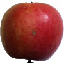

In [38]:
img #display the loaded image

In [39]:
index=['APPLES', 'BANANA', 'ORANGE','PINEAPPLE','WATERMELON']
result=str(index[classes_x[0]])
result


'APPLES'